# Numpy

In [4]:
import numpy as np
np.set_printoptions(suppress=True)

### 1. Linear equation 
Find x for Ax = b

In [15]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)
b = np.array([-5, 0, 10, -17])

In [ ]:
np.linalg.inv(A).dot(b)

**Tip:** have a look to np.set_printoptions

### 2. Cliping
Set all negatives values of array to zero

In [46]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)

In [ ]:
A[A < 0] = 0
A

### 3. Normalization
Normalize vector x (rescale values between 0, 1)

In [45]:
x = np.array([-4, 2, -1, 5, -10])

In [ ]:
x / np.linalg.norm(x)

### 4. Standardize
Standardize image with shape (height, width, channels). \
Each channel should have zero mean and unit variance.

In [5]:
img = np.array([
     [[105, 121,  90], [109, 125,  94], [107, 125,  89], [106, 124, 86]],
     [[106, 123,  90], [107, 124,  91], [106, 125,  87], [108, 123, 81]],
     [[106, 123,  90], [107, 124,  91], [107, 126,  88], [107, 123, 85]],
     [[107, 125,  90], [106, 122,  89], [108, 126,  89], [103, 121, 83]]
])

In [7]:
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

def standardise(col):
    return (col - np.mean(col))/np.std(col)

np.dstack([standardise(red), standardise(green), standardise(blue)])

array([[[-1.18245942, -1.80838886,  0.53457486],
        [ 1.8446367 ,  0.82199494,  1.80171529],
        [ 0.33108864,  0.82199494,  0.21778976],
        [-0.42568539,  0.16439899, -0.73256556]],

       [[-0.42568539, -0.49319696,  0.53457486],
        [ 0.33108864,  0.16439899,  0.85135997],
        [-0.42568539,  0.82199494, -0.41578045],
        [ 1.08786267, -0.49319696, -2.31649108]],

       [[-0.42568539, -0.49319696,  0.53457486],
        [ 0.33108864,  0.16439899,  0.85135997],
        [ 0.33108864,  1.47959089, -0.09899535],
        [ 0.33108864, -0.49319696, -1.04935066]],

       [[ 0.33108864,  0.82199494,  0.53457486],
        [-0.42568539, -1.15079291,  0.21778976],
        [ 1.08786267,  1.47959089,  0.21778976],
        [-2.69600749, -1.80838886, -1.68292087]]])

### 5. Euclidian distance
Calculate distance matrix between two sets of pooints 

In [37]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[9, 8], [7, 6], [5, 4], [3, 2]])

In [44]:
np.linalg.norm(a[:, None, :] - b[None, :, :], axis=-1)

array([[10.        ,  7.21110255,  4.47213595,  2.        ],
       [ 7.21110255,  4.47213595,  2.        ,  2.        ],
       [ 4.47213595,  2.        ,  2.        ,  4.47213595]])

# Pandas

In [10]:
import pandas as pd
url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
df = pd.read_csv(url)

### Task 1
Find the name, age and sex of oldest passenger on Titanic

In [18]:
df.describe()
pers = df[df.Age == df.Age.max()]
print(
    f"name: {pers.Name.values[0]}; "
    f"age: {pers.Age.values[0]}; "
    f"sex: {pers.Sex.values[0]}")

name: Barkworth, Mr. Algernon Henry Wilson; age: 80.0; sex: male


### Task 2
Show rows with passengers with age greater than 5 percantile and less than 95 percantile

In [ ]:
df[(df["Age"].quantile(.05)< df["Age"]) & (df["Age"] < df["Age"].quantile(.95))]

### Task 3

Show correlation between features

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.heatmap(df.corr(), annot=True)
plt.show()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Task 4
Find average fare for survived and not survived passengers 

In [16]:
print(np.average(df['Fare'][df['Survived'] == True]))
print(np.average(df['Fare'][df['Survived'] == False])) # avg fare for not survived passengers

48.39540760233918
22.117886885245902


### Task 5
Vizualize boxplot to compare distributions of survived and not survived passengers.

Not Survived Fare:

<AxesSubplot:>

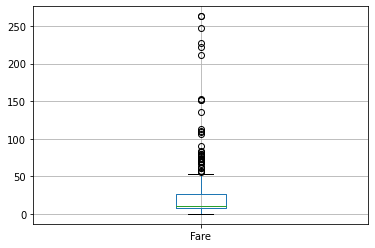

In [28]:
df[df['Survived'] == False].filter(items=['Fare']).boxplot(column="Fare")

Survived Fare:

<AxesSubplot:>

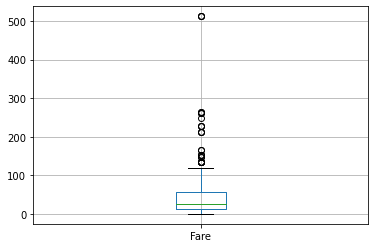

In [29]:
df[df['Survived'] == True].filter(items=['Fare']).boxplot(column="Fare")